1 напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [1358]:
import numpy as np

def linear_hypothesis(W, X):
    """
    Гіпотеза лінійної регресії у векторному вигляді.
    Параметри:
    - W: Вектор ваг.
    - X: Матриця вхідних ознак.

    Повертає:
    - Гіпотеза лінійної регресії для кожного рядка вхідної матриці X.
    """
    return np.dot(X, W)

2 створіть функцію для обчислення функції втрат у векторному вигляді;

In [1359]:

def loss_function(W, X, y):
    """
    Обчислює функцію втрат.
    Параметри:
    - W: Вектор ваг.
    - X: Матриця вхідних ознак.
    - y: Вектор фактичних значень.
    - m: Кількість прикладів у датасеті.

    Повертає:
    - Значення функції втрат.
    """
    # m = X.shape[0] 
    m = len(y)
    hypothesis = linear_hypothesis(W, X)
    squared_errors = (hypothesis - y) ** 2
    cost = (1 / (2 * m)) * np.sum(squared_errors)
    return cost


3 реалізуйте один крок градієнтного спуску;

In [1360]:

def gradient_descent_step(W, X, y, learning_rate =  0.00000001):
    """
    Виконує один крок градієнтного спуску для лінійної регресії.

    Параметри:
    - W: Вектор ваг.
    - X: Матриця вхідних ознак.
    - y: Вектор фактичних значень.
    - m: Кількість прикладів у датасеті.
    - learning_rate: Крок навчання (швидкість навчання).

    Повертає:
    - Оновлений вектор параметрів моделі (ваги).
    """
    # m = X.shape[0] 
    m = len(y)
    hypothesis = linear_hypothesis(W, X)
    gradient = (1 / m) * np.dot(X.T, (hypothesis - y))
    W = W - learning_rate * gradient
    
    
    return W


Читання файлу


In [1361]:
import pandas as pd
dataset = pd.read_csv("Housing.csv")
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [1362]:
dataset[dataset.isna()].count()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [1363]:
dataset.shape

(545, 13)

4 знайдіть найкращі параметри вектор w для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

Виділення вхідних ознак X та вихідних значень y. Розділення даних на тренувальний та тестовий набори 80/20.

In [1364]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = dataset[["area", "bedrooms", "bathrooms"]]
y = dataset["price"]
X = np.concatenate([np.ones((X.shape[0], 1)), X], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




Навчання моделі

In [1365]:
def gradient_descent(W, X, y, learning_rate, num_iterations):
    for _ in range(num_iterations):
        W = gradient_descent_step(W, X, y, learning_rate)
        cost = loss_function(W, X, y)
        print(f"Iteration {_ + 1}/{num_iterations}, Cost: {cost}")
    return W

w = np.zeros(X_train.shape[1])
result = gradient_descent(w, X_train, y_train, 0.00000001, 200)
print(result)


Iteration 1/200, Cost: 6777141398398.96
Iteration 2/200, Cost: 4029787983474.8247
Iteration 3/200, Cost: 2737387038010.438
Iteration 4/200, Cost: 2129420033856.1814
Iteration 5/200, Cost: 1843422186667.764
Iteration 6/200, Cost: 1708884008236.9485
Iteration 7/200, Cost: 1645594987571.2566
Iteration 8/200, Cost: 1615822760675.6865
Iteration 9/200, Cost: 1601817393345.4204
Iteration 10/200, Cost: 1595229020082.577
Iteration 11/200, Cost: 1592129724702.8936
Iteration 12/200, Cost: 1590671749831.774
Iteration 13/200, Cost: 1589985879540.158
Iteration 14/200, Cost: 1589663220137.9333
Iteration 15/200, Cost: 1589511421204.1926
Iteration 16/200, Cost: 1589439997888.4287
Iteration 17/200, Cost: 1589406384605.7424
Iteration 18/200, Cost: 1589390557794.0955
Iteration 19/200, Cost: 1589383098035.4846
Iteration 20/200, Cost: 1589379574278.3635
Iteration 21/200, Cost: 1589377902082.08
Iteration 22/200, Cost: 1589377100890.9392
Iteration 23/200, Cost: 1589376709435.1643
Iteration 24/200, Cost: 15893

5 знайдіть ці ж параметри за допомогою аналітичного рішення;

In [1366]:
w_analytical = np.linalg.inv(X.T @ X) @ X.T @ y
print("аналітичне рішення:", w_analytical)

аналітичне рішення: [-1.73171608e+05  3.78762754e+02  4.06820034e+05  1.38604950e+06]


In [1367]:
model = LinearRegression()
model.fit(X, y)

w_scikit = np.concatenate((np.array([model.intercept_]), model.coef_), axis=0)
print(w_scikit)


[-1.73171608e+05  0.00000000e+00  3.78762754e+02  4.06820034e+05
  1.38604950e+06]


6 порівняйте отримані результати.

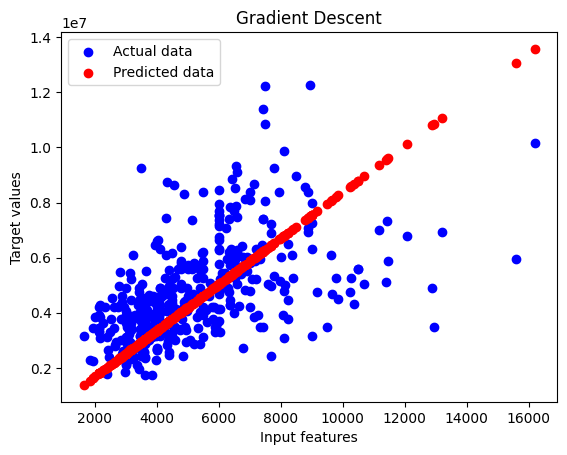

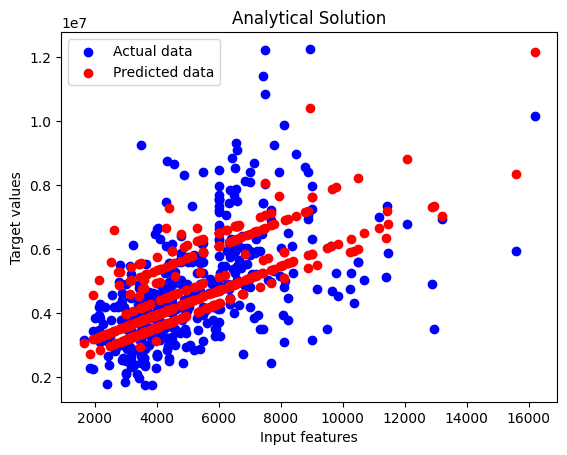

In [1368]:
import matplotlib.pyplot as plt

def plot_results(X, y, W, title):
    plt.scatter(X[:, 1], y, label='Actual data', color='blue')
    plt.scatter(X[:, 1], linear_hypothesis(W, X), label='Predicted data', color='red')
    plt.title(title)
    plt.xlabel('Input features')
    plt.ylabel('Target values')
    plt.legend()
    plt.show()

plot_results(X_train, y_train, result, 'Gradient Descent')
plot_results(X_train, y_train, w_analytical, 'Analytical Solution')


